In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Carga de datos

In [2]:
missing_values = ['NA','na','--','?','-','None','none','non','nil','NaN']
#fn = pd.read_excel('data_plagas_arroz_neg.xlsx',sheet_name='Sheet1', na_values=missing_values, encoding = "ISO-8859-1") .
dfo = pd.read_csv('positivos_covid.csv', na_values=missing_values, encoding = "ISO-8859-1", sep=';') 
print('dfo Shape:',dfo.shape)
#dfo.head()
dfo.head(3)
#dfo.columns

dfo Shape: (952439, 9)


,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20201123,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,EN INVESTIGACIÃN,EN INVESTIGACIÃN,PCR,41.0,MASCULINO,20200527.0
1,20201123,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,BREÃA,PCR,41.0,MASCULINO,20200511.0
2,20201123,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PCR,51.0,MASCULINO,20200411.0


In [3]:
dfo.columns

Index(['ï»¿FECHA_CORTE', 'UUID', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'METODODX', 'EDAD', 'SEXO', 'FECHA_RESULTADO'],
      dtype='object')

In [4]:
cols = ['ï»¿FECHA_CORTE', 'UUID', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO','METODODX','EDAD','SEXO','FECHA_RESULTADO']

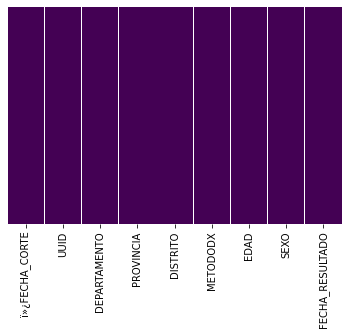

In [5]:
sns.heatmap(dfo[cols].isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [6]:
# Controlando valores nulos
dfo[cols].isnull().any().any()

True

In [7]:
#porcentaje de valores null por columna
(dfo[cols].isnull().sum() / len(dfo[cols]))*100

ï»¿FECHA_CORTE     0.000000
UUID               0.000000
DEPARTAMENTO       0.000000
PROVINCIA          0.000000
DISTRITO           0.000000
METODODX           0.000000
EDAD               0.003780
SEXO               0.000000
FECHA_RESULTADO    0.036013
dtype: float64

In [8]:
print(pd.value_counts(dfo[cols]['SEXO'], sort = True))
print(pd.value_counts(dfo[cols]['METODODX'], sort = True))


MASCULINO    494390
FEMENINO     458049
Name: SEXO, dtype: int64
PR     740297
PCR    212142
Name: METODODX, dtype: int64


In [9]:
df=dfo[cols]

In [10]:
#indexar
def substitute_clase(a2):
    mapping={'MASCULINO':0, 'FEMENINO':1}
    a2['SEXO_I']=a2['SEXO'].map(mapping)
    return a2
df.pipe(substitute_clase)
print(pd.value_counts(df['SEXO_I'], sort = True))

0    494390
1    458049
Name: SEXO_I, dtype: int64


In [11]:
df

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,SEXO_I
0,20201123,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,EN INVESTIGACIÃN,EN INVESTIGACIÃN,PCR,41.0,MASCULINO,20200527.0,0
1,20201123,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,BREÃA,PCR,41.0,MASCULINO,20200511.0,0
2,20201123,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PCR,51.0,MASCULINO,20200411.0,0
3,20201123,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,SAN BORJA,PCR,26.0,FEMENINO,20200411.0,1
4,20201123,566af4276cbe9359abe93f9aa86396c3,CALLAO,CALLAO,BELLAVISTA,PCR,47.0,MASCULINO,20200415.0,0
...,...,...,...,...,...,...,...,...,...,...
952434,20201123,325e9493ca05a17f9a01ee5abbea81ed,CUSCO,LA CONVENCION,SANTA ANA,PR,9.0,MASCULINO,20200718.0,0
952435,20201123,b0881561bd0538242ad68c5feed33f35,AREQUIPA,AREQUIPA,SOCABAYA,PR,2.0,MASCULINO,20200723.0,0
952436,20201123,c376a825ac624d43a3bfe601c7397118,AREQUIPA,AREQUIPA,YANAHUARA,PR,9.0,MASCULINO,20200808.0,0
952437,20201123,8e153af65c46c2a63655688946505c0e,CUSCO,CUSCO,SAN SEBASTIAN,PR,7.0,MASCULINO,20200820.0,0


#Observar las relaciones mediante una matriz de correlaciones.

In [40]:
cols_f = [ 'EDAD', 'SEXO', 'SEXO_I']
df[cols_f]

,EDAD,SEXO,SEXO_I
0,41.0,MASCULINO,0
1,41.0,MASCULINO,0
2,51.0,MASCULINO,0
3,26.0,FEMENINO,1
4,47.0,MASCULINO,0
...,...,...,...
952434,9.0,MASCULINO,0
952435,2.0,MASCULINO,0
952436,9.0,MASCULINO,0
952437,7.0,MASCULINO,0


In [41]:
df[cols_f].corr()['SEXO_I'].sort_values(ascending=False)

SEXO_I    1.000000
EDAD     -0.035207
Name: SEXO_I, dtype: float64

In [42]:
df_f =df[['EDAD', 'SEXO_I']]
df_f.head()

,EDAD,SEXO_I
0,41.0,0
1,41.0,0
2,51.0,0
3,26.0,1
4,47.0,0


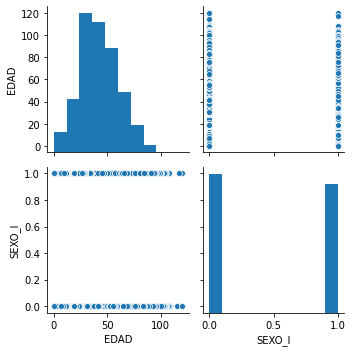

In [43]:
sns.pairplot(df_f, height=2.5)
plt.tight_layout()
# plt.savefig('imagenes/10_03.png', dpi=300)
plt.show()

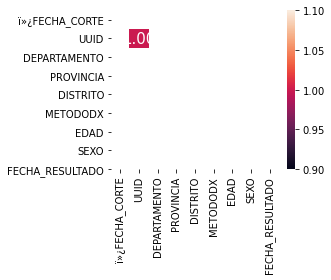

In [46]:
cm = np.corrcoef(df_f.values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
#plt.savefig('imagenes/10_04.png', dpi=300)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_f.iloc[:, :-1].values
y = df_f['SEXO_I'].values

In [19]:
X

array([[41.],
       [41.],
       [51.],
       ...,
       [ 9.],
       [ 7.],
       [ 0.]])

In [20]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
import scipy

In [23]:
scipy.stats.shapiro(y_train)

/opt/conda/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6403080821037292, pvalue=0.0)

In [24]:
from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
#Se crea la lista "models" la cual contendra los algoritmos de machine learning para la construcción del modelo:
#El algoritmo 'LRN' el cual es 'LogisticRegression' que representa 'Regresión Logística',
#El algoritmo 'LDA' el cual es 'LinearDiscriminantAnalysis' que representa 'Análisis Discriminante',
#El algoritmo 'SVM' el cual es 'SVC' que representa 'Máquina de soporte de vectores',
#El algoritmo 'SGD' el cual es 'SGDClassifier' que representa 'Pendiente de Gradiente Estocástico',
#El algoritmo 'KNN' el cual es 'KNeighborsClassifier' que representa 'Vecinos más Cercanos',
#El algoritmo 'GNB' el cual es 'GaussianNB' que representa 'Clasificador Bayesiano Ingenuo',
#El algoritmo 'DTS' el cual es 'DecisionTreeClassifier' que representa 'Árbol de Decisión',
#El algoritmo 'RFS' el cual es 'RandomForestClassifier' que representa 'Bosques Aleatorios',
#El algoritmo 'NNM' el cual es 'MLPClassifier' que representa 'Redes Neuronales' y
#El algoritmo 'XGB' el cual es 'XGBClassifier' que representa 'Potenciador del Gradiente Extremo',
models = []
models.append(('LRN', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTS', DecisionTreeClassifier()))
models.append(('RFS', RandomForestClassifier()))
models.append(('NNM', MLPClassifier()))
models.append(('XGB', XGBClassifier()))

#Se crea una lista "result" que almacenara los resultados de la validación cruzada
results = []

#Se crea una lista "names" que almacenara los nombres de los algoritmos de machine learning
names = []

#Se ejecuta el ciclo 'for' con todos los algoritmos de machine learning elegidos:
#Repete y calcula la media aritmética de las medidas de evaluación de las diferentes particiones
#Proceso de validación cruzada con 10 interacciones de los datos de entrenamiento
#Se divide en 10 partes, entrena en 9, valida en 1 y repite el proceso 10 veces
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LRN: nan (nan)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params

LDA: nan (nan)
SVM: nan (nan)
SGD: nan (nan)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "/opt/conda/lib/python3.8/sit

KNN: nan (nan)
GNB: nan (nan)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1131, in fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "/opt/conda/lib/pyt

DTS: nan (nan)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 645, in check_

RFS: nan (nan)
NNM: nan (nan)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 326, in _fit
    X, y = self._validate_input(X, y, incremental)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 964, in _validate_input
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc'],
  File "/opt/conda/lib/python3.8/site-packages/sk

XGB: 0.525267 (0.001266)


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


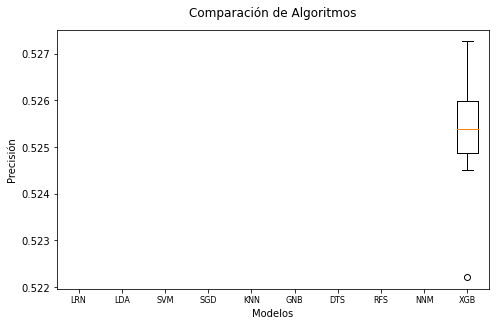

In [27]:
#Se crea el diagrama de caja y bigotes con los resultados de evaluación de los modelos para 
#Comparar la Distribución y Precisión media para cada modelo
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
fig.subplots_adjust(left=0.00, right=1.0, top=0.9, bottom=0.0)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=0, fontsize=8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión')
plt.show()

In [28]:
print('model:',names[9])
results[9]

model: XGB


array([0.52541585, 0.52451591, 0.52483089, 0.52588082, 0.52603081,
       0.52534085, 0.52726073, 0.52621869, 0.52495875, 0.52221389])

In [29]:
print('model:',names[7])
results[7]

model: RFS


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [30]:
print('model:',names[6])
results[6]

model: DTS


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [31]:
#Se escoge el mejor modelo predictivo
XGB = XGBClassifier()

#Se entrena el modelo escogido
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictions = XGB.predict(X_test)

In [33]:
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictions))

#Matriz de confusión
print(confusion_matrix(y_test, predictions))

#Reporte de clasificación
print(classification_report(y_test, predictions))


0.524396987386782
[[113535  34958]
 [100937  36302]]
              precision    recall  f1-score   support

           0       0.53      0.76      0.63    148493
           1       0.51      0.26      0.35    137239

    accuracy                           0.52    285732
   macro avg       0.52      0.51      0.49    285732
weighted avg       0.52      0.52      0.49    285732



Guardando el modeo machine learning

In [34]:
from joblib import dump
dump(XGB, 'XGB.joblib') 

['XGB.joblib']

In [35]:
from joblib import load
XGBloaded = load('XGB.joblib') 

In [36]:
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictions2 = XGBloaded.predict(X_test)

In [37]:
#Reporte de clasificación
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.53      0.76      0.63    148493
           1       0.51      0.26      0.35    137239

    accuracy                           0.52    285732
   macro avg       0.52      0.51      0.49    285732
weighted avg       0.52      0.52      0.49    285732



In [38]:
y_test

array([1, 1, 0, ..., 0, 0, 1])

In [39]:
predictions2

array([0, 0, 0, ..., 0, 0, 1])

un balanceo de distribución de los datos

buscar los mejores hiperparámetros